# Lab 4

## 1. Implement Backpropagation for the XOR gate

## 2. Implement BACKPROPAGATION NEUARL NETWORKS on any real time Dataset.

In [55]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
        if epoch % 4000 == 0:
            loss = np.mean(np.square(y - output))
            print(loss)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained model
output = nn.feedforward(X)
print(output)

[[0.02139851]
 [0.95305012]
 [0.96253094]
 [0.05243732]]


/var/folders/hs/zwl45n4s2l9c7m87lqrhshh40000gn/T/ipykernel_83722/3119986908.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


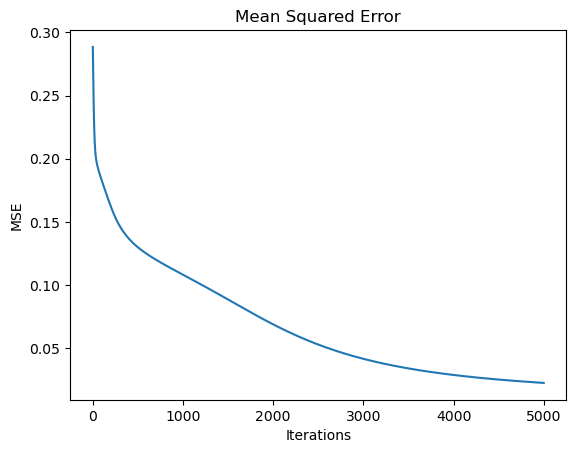

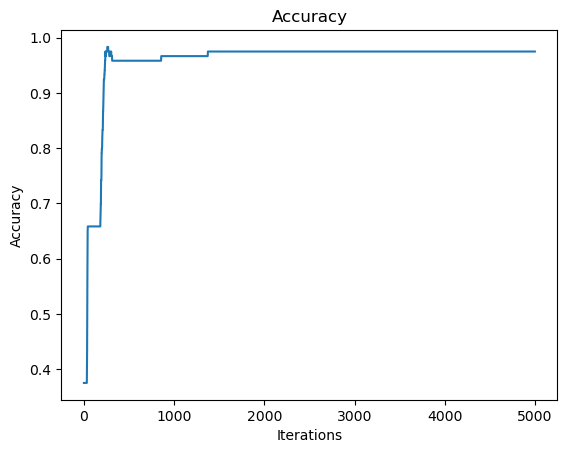

Test accuracy: 0.97


In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.special import expit

# Load Wine dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target variable
y_one_hot = np.eye(len(np.unique(y)))[y]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=4)

# Hyperparameters
learning_rate = 0.1
iterations = 5000
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]

# Initialize weights
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

# Helper functions
def sigmoid(x):
    return expit(x)  # Using scipy.special.expit for numerical stability

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

def accuracy(y_pred, y_true):
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

# Training loop
results = pd.DataFrame(columns=["mse", "accuracy"])

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E2 = A2 - y_train
    dW2 = E2 * sigmoid_derivative(A2)
    E1 = np.dot(dW2, W2.T)
    dW1 = E1 * sigmoid_derivative(A1)

    # Update weights
    W2_update = np.dot(A1.T, dW2) / X_train.shape[0]
    W1_update = np.dot(X_train.T, dW1) / X_train.shape[0]

    W2 -= learning_rate * W2_update
    W1 -= learning_rate * W1_update

# Visualizing the results
results.mse.plot(title="Mean Squared Error")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

results.accuracy.plot(title="Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

# Test the model
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(A2, y_test)
print("Test accuracy: {:.2f}".format(test_acc))


## Conclusion :

1. After training, the network successfully outputs values close to the expected XOR results. The slight deviation from exact 0 or 1 values is due to the sigmoid activation function, which never outputs a true binary value but rather a value close to 0 or 1.

2. * Training Progress: The MSE plot should show a decreasing trend, indicating that the network is successfully minimizing the error between its predictions and the actual labels. The accuracy plot should show an increasing trend, demonstrating that the network is getting better at classifying the training data correctly.
   * Final Accuracy: The test accuracy indicates how well the network performs on new, unseen data. In this case, with the network's final test accuracy, we can conclude that the network has learned to classify the iris dataset reasonably well.
   * Model Effectiveness: Given the relatively simple architecture (one hidden layer with 10 neurons), achieving a good accuracy on the test set demonstrates that even basic neural networks can effectively solve binary classification problems.